In [1]:
# TensorFlow y tf.keras
#import cv2
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import imageio # Es una libreria para leer y escribir una amplia gama de datos de imágenes
import pandas as pd
import seaborn as sns
from argparse import ArgumentParser
from keras.utils import np_utils
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

2.3.1


In [2]:
df_test = pd.read_csv("test_set.csv")
df = pd.read_csv("train_set.csv")
df

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg
...,...,...,...
6171,sadness,11346,sadness/11346.jpg
6172,sadness,4441,sadness/04441.jpg
6173,sadness,15236,sadness/15236.jpg
6174,sadness,27361,sadness/27361.jpg


In [5]:
prueba = imageio.imread('00007.jpg')
prueba#.shape

Array([[ 73,  81,  78, ...,  73,  75,  77],
       [ 78,  84,  81, ...,  74,  77,  79],
       [ 83,  87,  82, ...,  75,  78,  79],
       ...,
       [ 62,  68,  71, ...,  60,  80,  59],
       [ 68,  74,  74, ...,  49,  58,  78],
       [ 74,  79,  76, ..., 121,  68,  65]], dtype=uint8)

In [4]:
# Con esto cambio al directorio donde esta happy
os.chdir ('C:\\Users\\jl\Documents\\Jose_Luis\\Cursos\\The_bridge\\Personal_works\\others\\projects\\Kaggle_feeling_competition\\totrain\\totrain\\happy')

In [6]:
happy_files = os.listdir()

In [7]:
happy_pictures =[]
for elem in happy_files:
    happy_pictures.append(imageio.imread(elem))

In [8]:
happy_pictures[0].shape

(48, 48)

In [10]:
len(happy_pictures)

3285

In [11]:
happy_pictures[0]

Array([[ 73,  81,  78, ...,  73,  75,  77],
       [ 78,  84,  81, ...,  74,  77,  79],
       [ 83,  87,  82, ...,  75,  78,  79],
       ...,
       [ 62,  68,  71, ...,  60,  80,  59],
       [ 68,  74,  74, ...,  49,  58,  78],
       [ 74,  79,  76, ..., 121,  68,  65]], dtype=uint8)

In [12]:
# Ahora repito el proceso pero para las imagenes sadness
os.chdir( 'C:\\Users\\jl\Documents\\Jose_Luis\\Cursos\\The_bridge\\Personal_works\\others\\projects\\Kaggle_feeling_competition\\totrain\\totrain\\sadness')

In [13]:
sadness_files = os.listdir()

In [14]:
sadness_pictures = []

for elem in sadness_files:
    sadness_pictures.append(imageio.imread(elem))
    

In [15]:
sadness_pictures[0].shape, len(sadness_pictures)

((48, 48), 2891)

In [16]:
sadness_pictures[0]

Array([[ 23,  33,  33, ..., 173, 172, 173],
       [ 25,  33,  31, ..., 173, 172, 173],
       [ 27,  32,  29, ..., 173, 173, 173],
       ...,
       [158, 175, 170, ..., 160, 157, 154],
       [145, 154, 178, ..., 152, 151, 149],
       [142, 136, 153, ..., 144, 143, 142]], dtype=uint8)

In [17]:
X_list_train = happy_pictures + sadness_pictures

In [18]:
X_list_train[0]

Array([[ 73,  81,  78, ...,  73,  75,  77],
       [ 78,  84,  81, ...,  74,  77,  79],
       [ 83,  87,  82, ...,  75,  78,  79],
       ...,
       [ 62,  68,  71, ...,  60,  80,  59],
       [ 68,  74,  74, ...,  49,  58,  78],
       [ 74,  79,  76, ..., 121,  68,  65]], dtype=uint8)

In [19]:
X_list_train[3285]

Array([[ 23,  33,  33, ..., 173, 172, 173],
       [ 25,  33,  31, ..., 173, 172, 173],
       [ 27,  32,  29, ..., 173, 173, 173],
       ...,
       [158, 175, 170, ..., 160, 157, 154],
       [145, 154, 178, ..., 152, 151, 149],
       [142, 136, 153, ..., 144, 143, 142]], dtype=uint8)

In [20]:
len(X_list_train)

6176

In [21]:
# Stack them using axis=0. Convierto la lista de arrays en un único array. Antes los arrays eran de (48,48) y ahora el único array es (6176,48,48) siendo 6148 el nº de arrays que tenia en la lista
X_images = np.stack(X_list_train)
X_images.shape 

(6176, 48, 48)

In [22]:
# Categorizo el label. Paso  happy y sad a 0 y 1.
le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

In [23]:
y_labels = df['label'].values
y_labels.shape

(6176,)

In [24]:
y_labels

array([0, 0, 0, ..., 1, 1, 1])

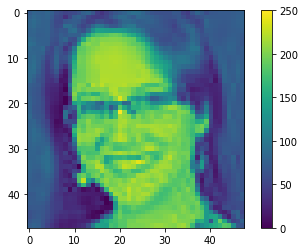

In [25]:
# Muestro la primera imagen del conjunto de entrenamiento, y confirmo que la imagen solo tiene un capa de color.
plt.figure()
plt.imshow(X_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

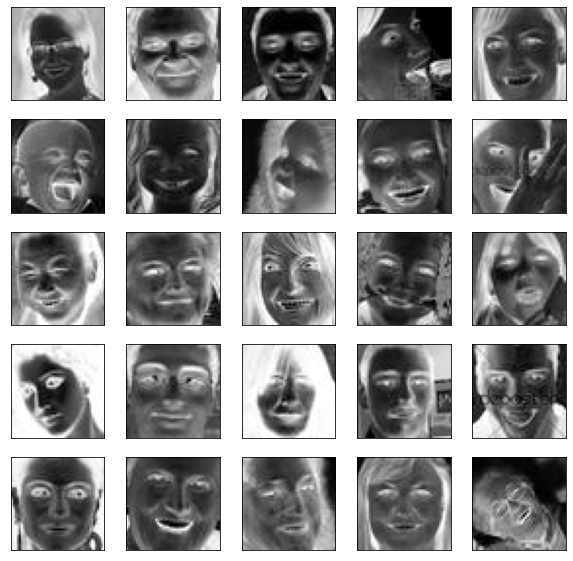

In [24]:
# Con cmap=plt.cm.binary muestro las imagens a una escala de grises.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_images[i], cmap=plt.cm.binary)
    #plt.xlabel(CIFAR_10_CLASSES[train_labels[i][0]])
plt.show()

Divido el conjunto de datos en train y test. train_images y test_images son las fotos y train_labels y test_labels son las etiquetas de los sentimientos.

Escalo los valores de las imagenes a un rango de 0 a 1 bits, las normalizo dividiendo entre 255

In [26]:
X_images = X_images.astype('float32') / 255.0

In [27]:
# Divido la muestra
train_images, test_images, train_labels, test_labels = train_test_split(X_images, y_labels, test_size=0.20, random_state=7)

In [28]:
train_images.shape

(4940, 48, 48)

In [29]:
# Debido a que son imágenes en escala de grises, el único canal de color se halla implícito. Sin embargo, Keras espera tensores de 4 dimensiones (incluyendo el batch size), no de 3, por lo que tenemos que expandir las dimensiones de los datos.
train_images_gr = train_images.reshape(train_images.shape[0], 48, 48, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 48, 48, 1)

print("train_images_gr shape:", train_images_gr.shape)
print("test_images_gr shape:", test_images_gr.shape)

train_images_gr shape: (4940, 48, 48, 1)
test_images_gr shape: (1236, 48, 48, 1)


In [227]:
# Construyo el modelo con capas de 16, 32, 64, 16 y 2 neuronas
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (48,48,1)

model3 = keras.models.Sequential()

# First conv-pool layers with 16 neurons and MaxPool2d
model3.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model3.add(keras.layers.Flatten())

# Dense layer (32 neurons) with dropout (0.25)
#model1.add(keras.layers.Dense(units=16, activation="relu"))

# 3ª capa de 80 neuronas
model3.add(keras.layers.Dense(units=128, activation="relu"))
model2.add(keras.layers.Dropout(rate=0.25))

# 4ª capa de 16 neuronas
#model3.add(keras.layers.Dense(units=32, activation="relu"))

# 4ª capa de 16 neuronas
#model3.add(keras.layers.Dense(units=16, activation="relu"))

# Output layer with 2 neuronas
model3.add(keras.layers.Dense(units=2, activation="softmax"))
model3.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 33856)             0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)               4333696   
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 258       
Total params: 4,334,594
Trainable params: 4,334,594
Non-trainable params: 0
_________________________________________________________________


In [228]:
# Compilo el modelo
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
sparse_categorical_crossentropy, mse....

## Entrenar el Modelo

Entreno el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en `train_images` y `train_labels`.
2. el modelo aprende a asociar imagenes y etiquetas.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [229]:
history = model3.fit(train_images_gr, train_labels, epochs=40)

C:\Users\jl\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
Epoch 1/40
155/155 [==============================] - 26s 170ms/step - loss: 0.6866 - accuracy: 0.6186
Epoch 2/40
155/155 [==============================] - 24s 155ms/step - loss: 0.5309 - accuracy: 0.7354
Epoch 3/40
155/155 [==============================] - 23s 150ms/step - loss: 0.4855 - accuracy: 0.7704
Epoch 4/40
155/155 [==============================] - 25s 160ms/step - loss: 0.4521 - accuracy: 0.7887
Epoch 5/40
155/155 [==============================] - 27s 172ms/step - loss: 0.4037 - accuracy: 0.8188
Epoch 6/40
155/155 [==============================] - 24s 154ms/step - loss: 0.3584 - accuracy: 0.8350
Epoch 7/40
155/155 [==============================] - 23s 148m

## Evaluar Exactitud

Comparo el rendimiento del modelo con el set de datos:

In [230]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

39/39 - 2s - loss: 1.2261 - accuracy: 0.7597


In [231]:
predictions = model3.predict(test_images)

In [212]:
predictions[10]

array([0.9744217 , 0.02557837], dtype=float32)

In [213]:
np.argmax(predictions[10])

0

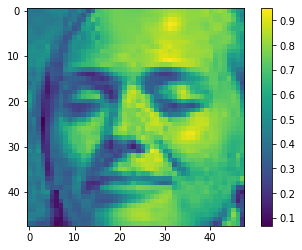

In [183]:
# Ploteo la imagen usada para predecir
plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [184]:
#Ahora compruebo que etiqueta tiene ese elemento del conjunto de test y como sale 0, implica que es correcta la predicción
test_labels[10]

0

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [161]:
df_test

,id_img,path
0,18341,to_pred/18341.jpg
1,13176,to_pred/13176.jpg
2,23945,to_pred/23945.jpg
3,15968,to_pred/15968.jpg
4,18382,to_pred/18382.jpg
...,...,...
4112,8966,to_pred/08966.jpg
4113,12111,to_pred/12111.jpg
4114,16629,to_pred/16629.jpg
4115,24322,to_pred/24322.jpg


In [86]:
# Con esto cambio al directorio donde esta test
os.chdir ('C:\\Users\\jl\Documents\\Jose_Luis\\Cursos\\The_bridge\\Personal_works\\others\\projects\\Kaggle_feeling_competition\\to_pred\\to_pred')

In [87]:
pred_files = os.listdir()

In [88]:
len(pred_files)

4117

In [89]:
pred_pictures = []

for elem in pred_files:
    pred_pictures.append(imageio.imread(elem))

In [90]:
# Stack them using axis=0. Convierto la lista de arrays en un único array. Antes los arrays eran de (48,48) y ahora el único array es (4117,48,48) siendo 6148 el nº de arrays que tenia en la lista
pred_images = np.stack(pred_pictures)
pred_images.shape 

(4117, 48, 48)

In [91]:
# Escalo los valores en un nrango de 0 a 1 dividiendo entre 255, y a la par los pasos a float de 32-bits
pred_images = pred_images.astype('float32') / 255.0

In [92]:
pred_images.shape

(4117, 48, 48)

In [233]:
pred_submit = model3.predict(pred_images)
pred_submit

array([[7.5193483e-01, 2.4806517e-01],
       [9.9997652e-01, 2.3498236e-05],
       [9.9919540e-01, 8.0458907e-04],
       ...,
       [2.9531895e-04, 9.9970466e-01],
       [3.6372402e-08, 1.0000000e+00],
       [9.6204871e-01, 3.7951298e-02]], dtype=float32)

In [95]:
pred_submit.shape

(4117, 2)

In [215]:
pred_submit

array([[9.4458658e-01, 5.5413418e-02],
       [1.0000000e+00, 1.6443556e-08],
       [1.0000000e+00, 4.2794589e-08],
       ...,
       [2.4998322e-05, 9.9997497e-01],
       [2.0304486e-07, 9.9999976e-01],
       [9.0671325e-01, 9.3286768e-02]], dtype=float32)

In [234]:
#Tenia un array con 4117 filas y dos columnas y lo separo para convertirlo en una lista de 4117 arrays de 1 fila y dos columna
pred_new = np.split(pred_submit, 4117)
len(pred_new)

4117

En pred_nex tengo la salida de la capa SOFMAX que me está dando dos valores que indican la posibilidad de que sea happy o sadnexx la foto que esta prediciendo.
Como a mi solo me interesa el que realmente sea aplico lo de más abajo, que es quedarme con el valor más alto

In [235]:
# En la lista pred_submit_1valor tengo la prediccion en 1 y cero que ha echo el mi modelo con el conjunto de imágenes test
pred_submit_1valor=[]
for i, elem in enumerate(pred_new):
    pred_submit_1valor.append(np.argmax(pred_new[i]))
len(pred_submit_1valor)

4117

In [165]:
# Con esto cambio al directorio donde esta sample_submission
os.chdir ('C:\\Users\\jl\Documents\\Jose_Luis\\Cursos\\The_bridge\\Personal_works\\others\\projects\\Kaggle_feeling_competition')

In [166]:
sample = pd.read_csv("sample_submission.csv")
sample

,id_img,label
0,18341,sadness
1,13176,sadness
2,23945,happy
3,15968,happy
4,18382,happy
...,...,...
4112,8966,sadness
4113,12111,sadness
4114,16629,sadness
4115,24322,sadness


In [167]:
sample['label'].value_counts()

happy      2184
sadness    1933
Name: label, dtype: int64

In [ ]:
predictions_test = le.inverse_transform(prediction_test)

In [ ]:
#le = LabelEncoder()
#df["label"] = le.fit_transform(df["label"])

In [236]:
submission_1 = pd.DataFrame({'id_img': sample['id_img'], 'label': pred_submit_1valor})

In [237]:
submission_1.head()

,id_img,label
0,18341,0
1,13176,0
2,23945,0
3,15968,1
4,18382,1


In [220]:
submission_1['label'].value_counts()

0    2209
1    1908
Name: label, dtype: int64

In [238]:
submission_1.label= submission_1.label.map(lambda x: 'happy' if x==0 else 'sadness')

In [239]:
submission_1

,id_img,label
0,18341,happy
1,13176,happy
2,23945,happy
3,15968,sadness
4,18382,sadness
...,...,...
4112,8966,happy
4113,12111,happy
4114,16629,sadness
4115,24322,sadness


In [240]:
submission_1.label.value_counts()

happy      2122
sadness    1995
Name: label, dtype: int64

In [241]:
if submission_1.shape == sample.shape:
    if submission_1.columns.all() == sample.columns.all():
        if submission_1.id_img.all() == sample.id_img.all():
            print("you're ready to submit!")
            submission_1.to_csv("to_submit_131N.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
